# Day 08. Exercise 05
# Clustering

## 0. Imports

In [243]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

## 1. Preprocessing

1. Read the file [`regression.csv`](https://drive.google.com/file/d/1fzOPkuXoxLleOsvNVCT0m-LKxlid33ma/view?usp=sharing) to a dataframe.
2. Remove the `pageviews`, we will cluster the users only by the number of the commits and their average difference.

In [244]:
df = pd.read_csv("../data/regression.csv")
df.drop("pageviews", axis=1, inplace=True)
df

,uid,num_commits,AVG(diff)
0,user_1,62,-64.400000
1,user_10,20,-74.800000
2,user_14,61,-159.000000
3,user_17,51,-61.600000
4,user_18,5,-5.666667
5,user_19,118,-98.750000
6,user_21,65,-95.500000
7,user_25,79,-92.600000
8,user_28,60,-86.400000
9,user_3,18,-105.400000


## 2. KMeans

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters, use `random_state=21` and `n_clusters=3`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `n_clusters` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

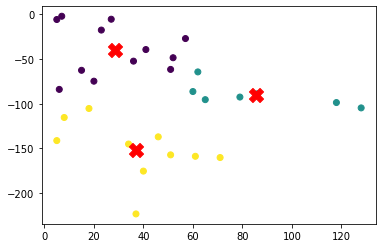

In [245]:
x = df[["num_commits", "AVG(diff)"]]
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans.fit(x)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200)
plt.show()


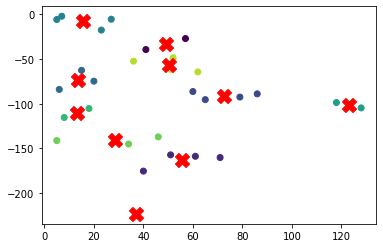

In [246]:
kmeans_test_n = KMeans(n_clusters=10, random_state=21)
kmeans_test_n.fit(x)
labels = kmeans_test_n.labels_
centers = kmeans_test_n.cluster_centers_

plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200)
plt.show()

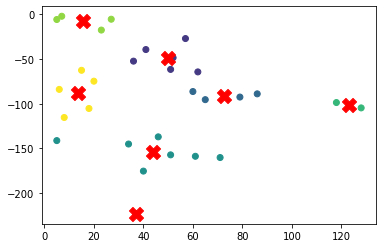

In [247]:
kmeans_test_n = KMeans(n_clusters=7, random_state=21)
kmeans_test_n.fit(x)
labels = kmeans_test_n.labels_
centers = kmeans_test_n.cluster_centers_

plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200)
plt.show()

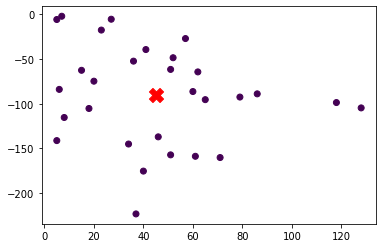

In [248]:
kmeans_test_n = KMeans(n_clusters=1, random_state=21)
kmeans_test_n.fit(x)
labels = kmeans_test_n.labels_
centers = kmeans_test_n.cluster_centers_

plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], c="red", marker="X", s=200)
plt.show()

In [249]:
predict_labels = kmeans.predict(x)
silhouette_score(x, predict_labels)

0.43901709571532954

## 3. DBSCAN

1. Check the documentation about how this algorithm works.
2. Use this algorithm to create clusters with `eps=20` and `min_samples=2`.
3. Visualize the data on a `scatter plot`.
4. Try different values of `eps` and `min_samples` and see how your plot will change.
5. Calculate the `silhouette_score` (check the docs about the metric).

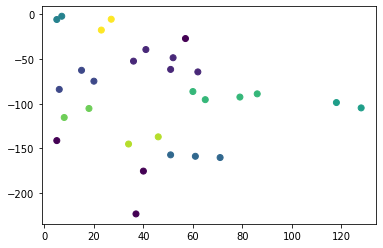

In [250]:
dbscan = DBSCAN(eps=20, min_samples=2)
dbscan.fit(x)

labels = dbscan.labels_
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()


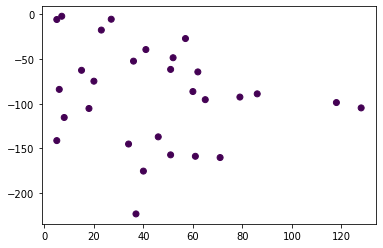

In [251]:
dbscan_test = DBSCAN(eps=2, min_samples=20)
dbscan_test.fit(x)

labels = dbscan_test.labels_
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()

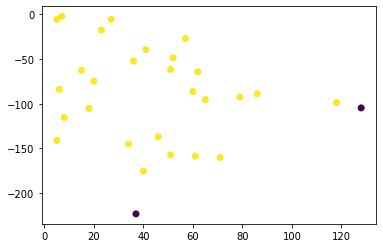

In [252]:
dbscan_test = DBSCAN(eps=40, min_samples=5)
dbscan_test.fit(x)

labels = dbscan_test.labels_
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()

In [253]:
labels = dbscan.labels_
silhouette_score(x, labels=labels)

0.38339641455696605

## 4. Hierarchical (AgglomerativeClustering)

1. Use this algorithm to create clusters with `n_clusters=5`.
2. Visualize the data on a `scatter plot`.
3. Try different values of `n_clusters` and see how your plot will change.
4. Calculate the `silhouette_score`.
5. Visualize the `dendrogram`.

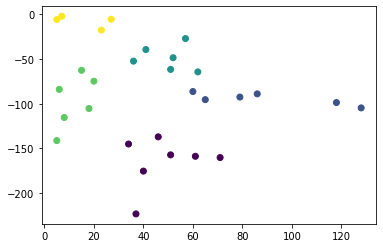

In [254]:
agg = AgglomerativeClustering(n_clusters=5)
labels = agg.fit_predict(x)
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()

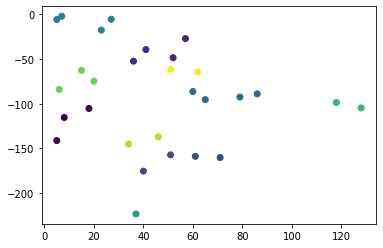

In [255]:
agg_test = AgglomerativeClustering(n_clusters=10)
labels = agg_test.fit_predict(x)
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()

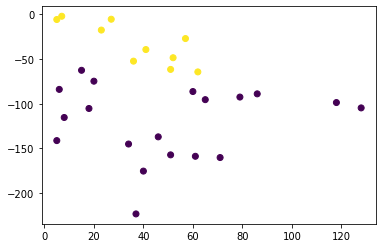

In [256]:
agg_test = AgglomerativeClustering(n_clusters=2)
labels = agg_test.fit_predict(x)
plt.scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
plt.show()

In [257]:
labels = agg.labels_
silhouette_score(x, labels)

0.46383015199381467

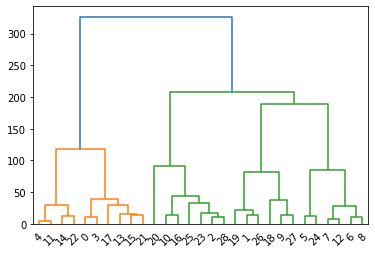

In [258]:
z = linkage(x, method="ward")
dendrogram(z)
plt.show()

## 5. Function

Write a function that:
1. Takes as arguments: model class of clustering, its parameters, the name of the parameter for optimization, the range of the parameter values to try.
2. Tries different values from the given parameter range and calculates the `silhouette_score` for each value from the range.
3. Finds out the best value for the parameter in the range.
4. Returns two subplots:


- - the first shows how the `silhouette_score` changes depending on the value of the parameter,
- - the second visualizes the data on a `scatter plot` using the clustering model with the best value of the parameter.

In [259]:
def function_optimization(model_class, base_params, param_name, param_values):
    params = base_params.copy()
    scores = []
    score, best_score, best_param_value = -1, -1, -1
    for val in param_values:
        params[param_name] = val
        model = model_class(**params)
        model.fit(x)
        labels = model.labels_
        score = silhouette_score(x, labels)
        scores.append(score)

        if score > best_score:
            best_score = score
            best_param_value = val

    
    fig, ax = plt.subplots(1, 2, figsize=(15, 8))
    ax[0].plot(param_values, scores, marker='o')
    ax[1].scatter(x["num_commits"], x["AVG(diff)"], c=labels, cmap="viridis")
    plt.show()

    return best_score, best_param_value

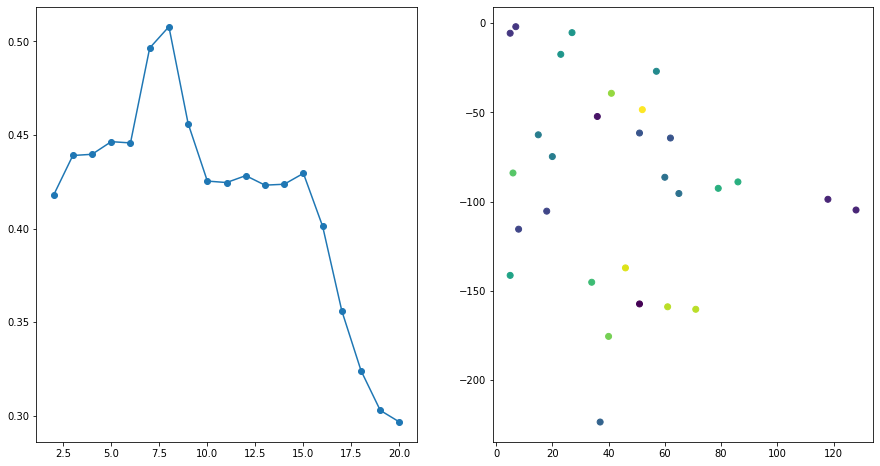

0.50779855565622 8


In [260]:
best_score, best_param_value = function_optimization(
    KMeans,
    {"random_state": 21},
    "n_clusters",
    range(2, 21)
)
print(best_score, best_param_value)

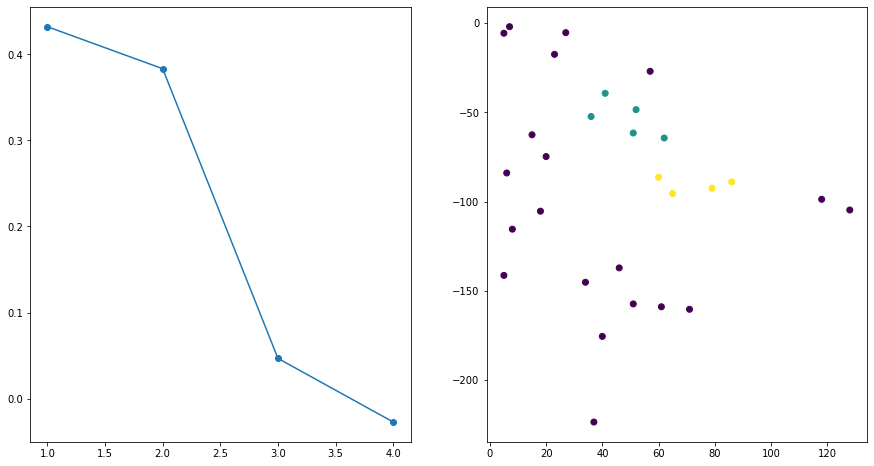

0.4322483665424572 1


In [261]:
best_score, best_param_value = function_optimization(
    DBSCAN,
    {"eps": 20},
    "min_samples",
    range(1, 5)
)
print(best_score, best_param_value)

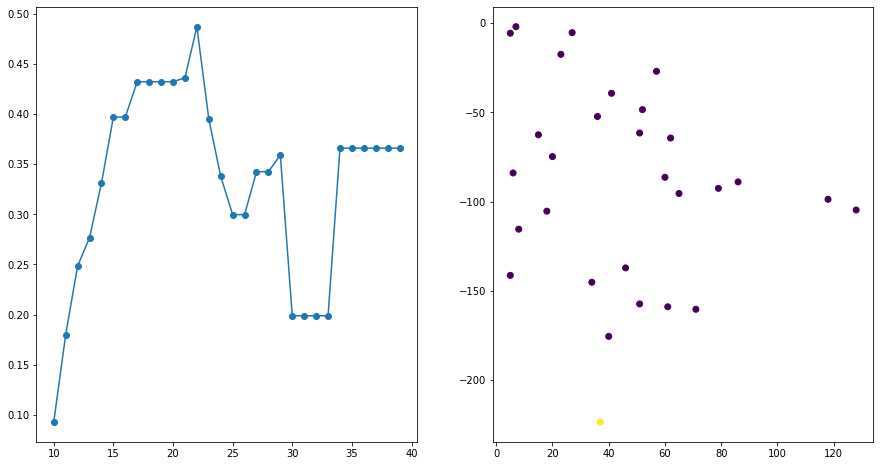

0.48713041554757475 22


In [263]:
best_score, best_param_value = function_optimization(
    DBSCAN,
    {"min_samples": 1},
    "eps",
    range(10, 40)
)
print(best_score, best_param_value)

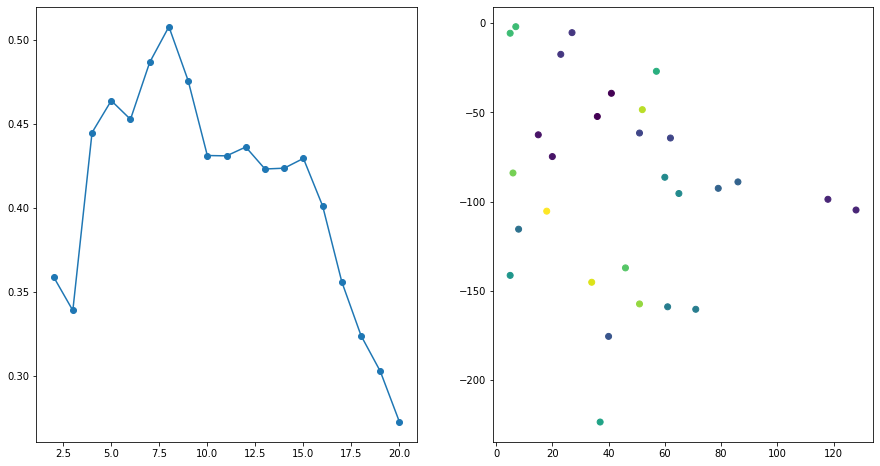

0.50779855565622 8


In [269]:
best_score, best_param_value = function_optimization(
    AgglomerativeClustering,
    {},
    "n_clusters",
    range(2, 21)
)
print(best_score, best_param_value)